### Python Final Assignment
### Suparna S - E22035

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.chdir(r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment')

att = pd.read_csv('attrition.csv')
att.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


Q1) Create a function named Graph_v1 that takes a dataset as input and exports boxplots and
histograms (in the form of PNG files) for all the numerical columns in the data and bar plots for all
the categorical columns of the data.


In [2]:
def Graphs_v1(att):
    num=att.select_dtypes(include=[np.number]) #Getting numerical columns from the dataset 
    cat=att.select_dtypes(exclude=[np.number]) #Getting categorical columns from the dataset
    
    for feature in num:
        
        #Creating Histogram for numerical columns
        num.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency of employees",fontsize=12) #Title of y-axis
        plt.title(feature +"Histogram",fontsize=16)  #Title of histogram
        plt.savefig(feature+"_Histogram.png", facecolor='w') #Exporting histogram as png image
        
        
        #Creating Boxplots for numerical columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        num.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot  

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
        plt.savefig(feature+"_BoxPlot.png", facecolor='w') #Exporting boxplot as png image
   
        
    #Creating Barplots for categorical columns
    for feature in cat:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        cat[feature].value_counts().plot(kind='bar', figsize=(8,16), color="coral", fontsize=12) #Creating barplot of features
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
        plt.title(feature+"Barplot of the employees", fontsize=16) #Title of barplot
        plt.savefig(feature+"_BarPlot.png", facecolor='w') #Exporting barplot as png image
    

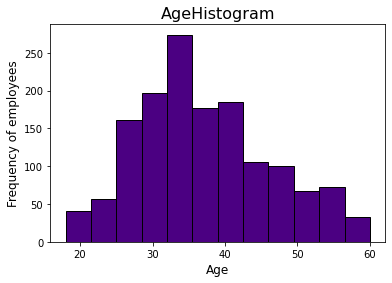

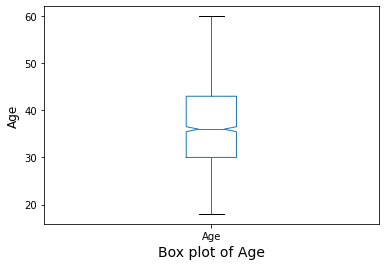

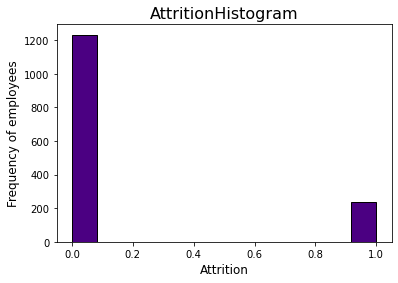

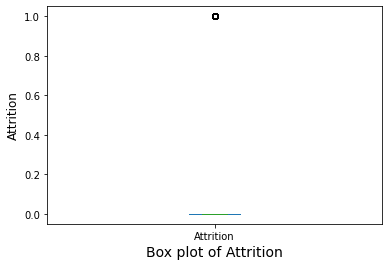

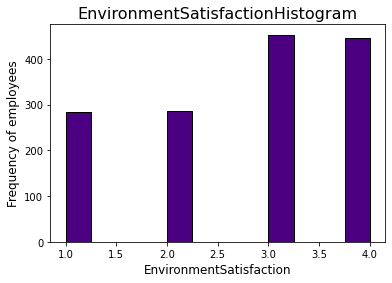

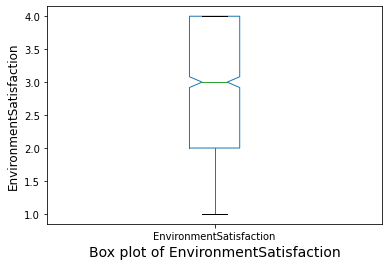

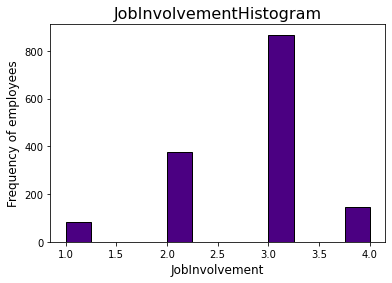

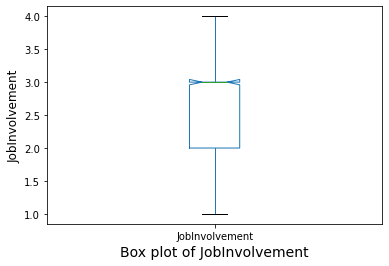

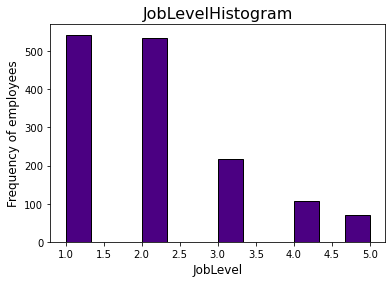

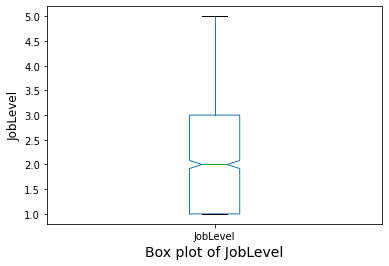

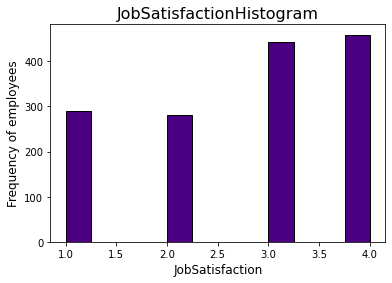

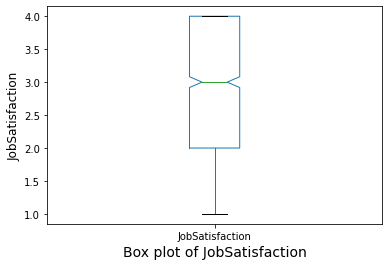

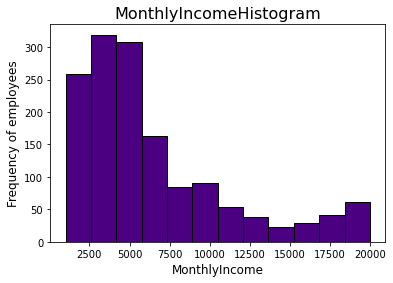

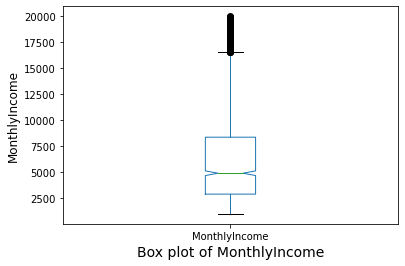

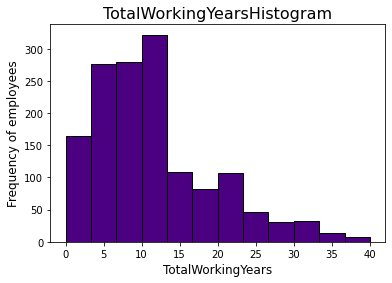

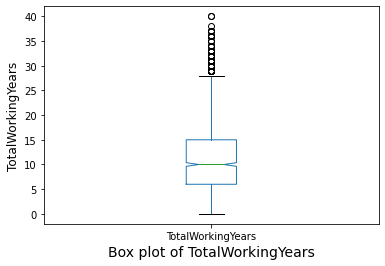

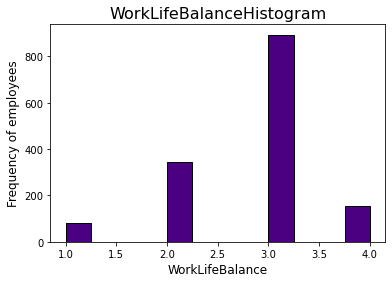

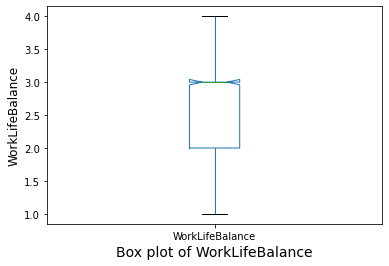

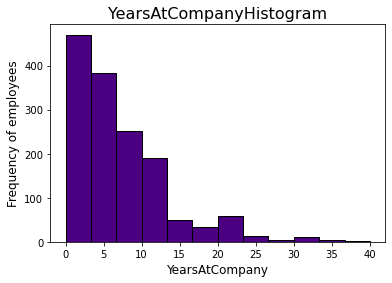

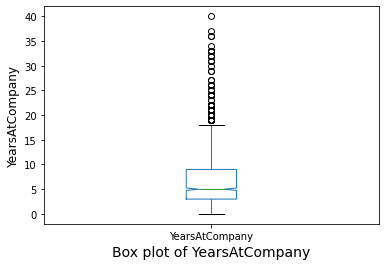

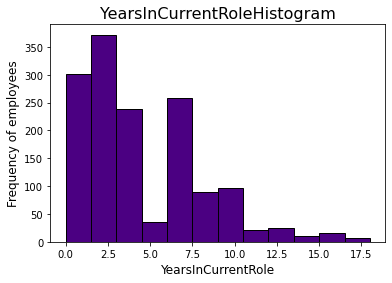

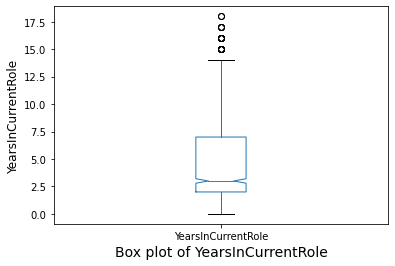

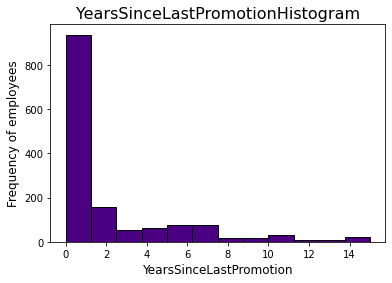

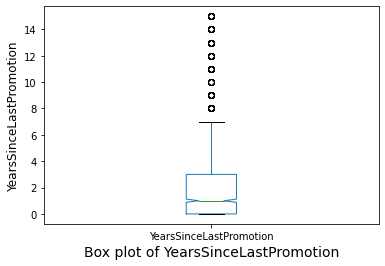

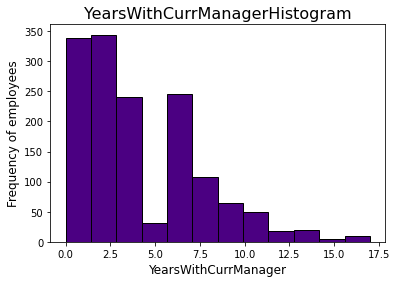

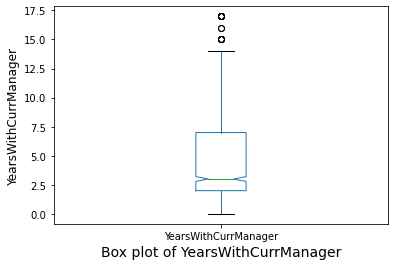

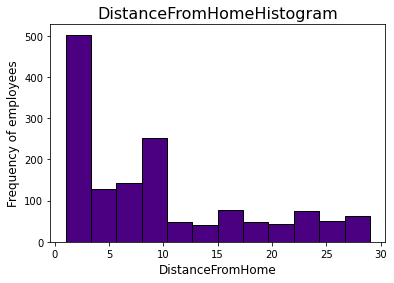

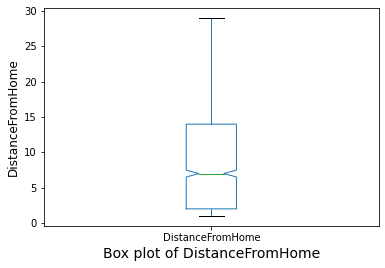

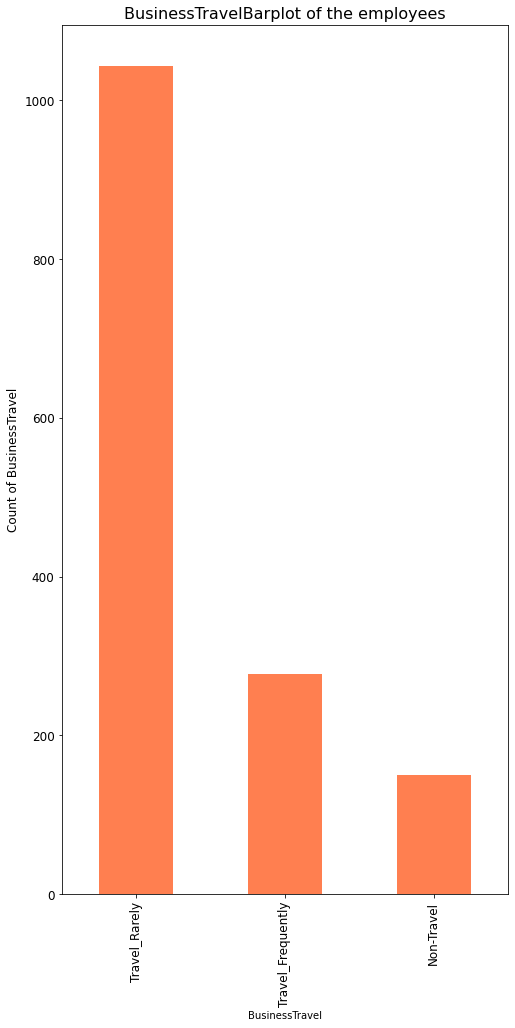

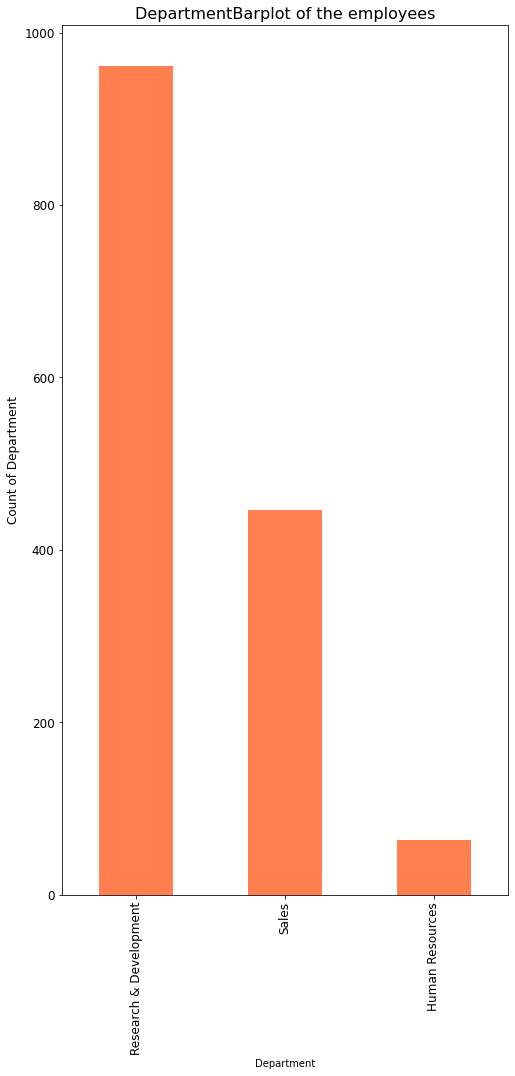

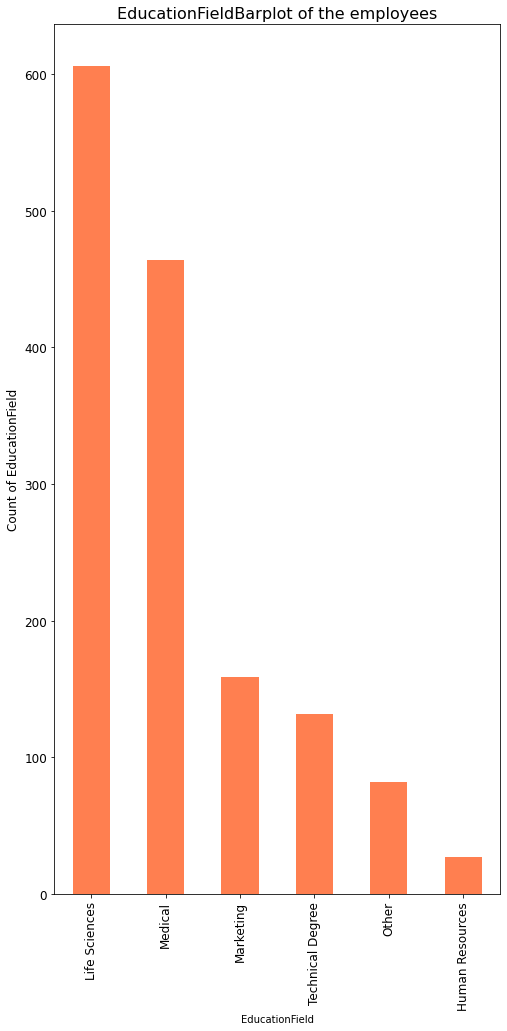

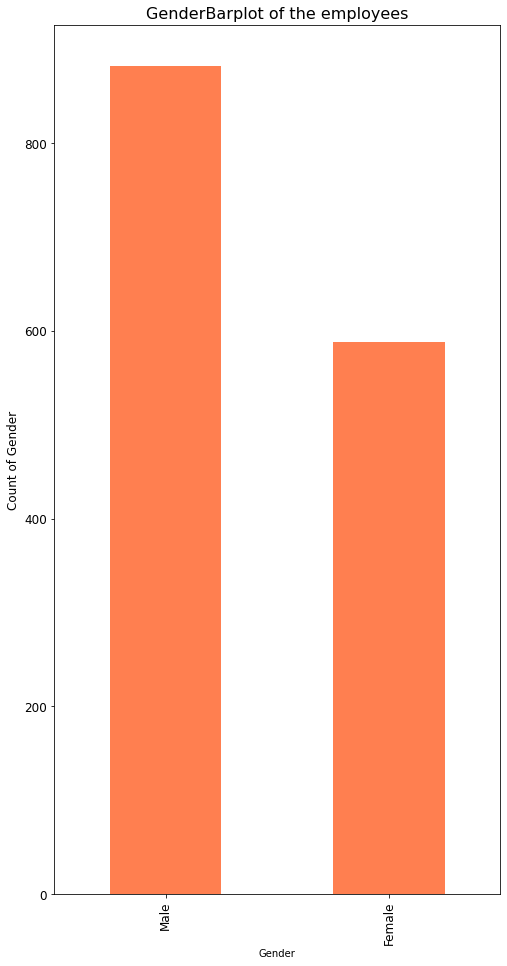

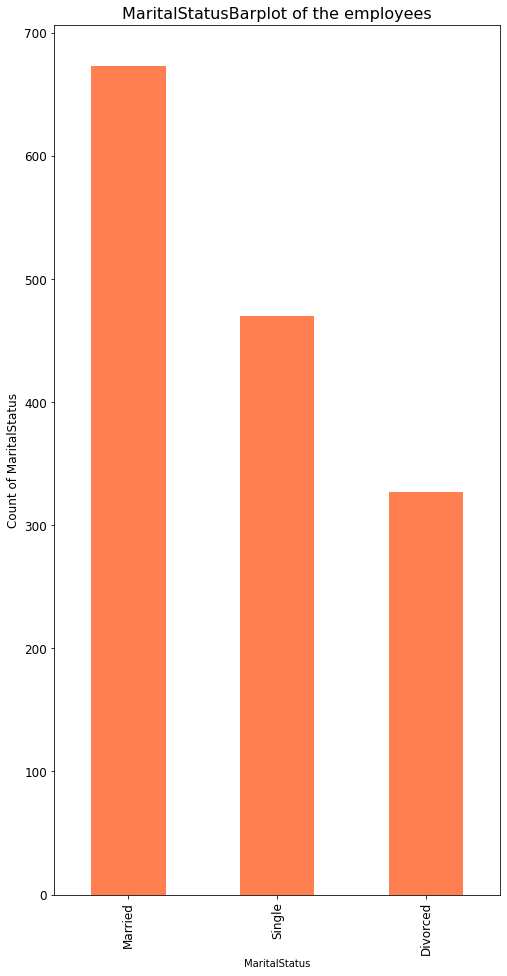

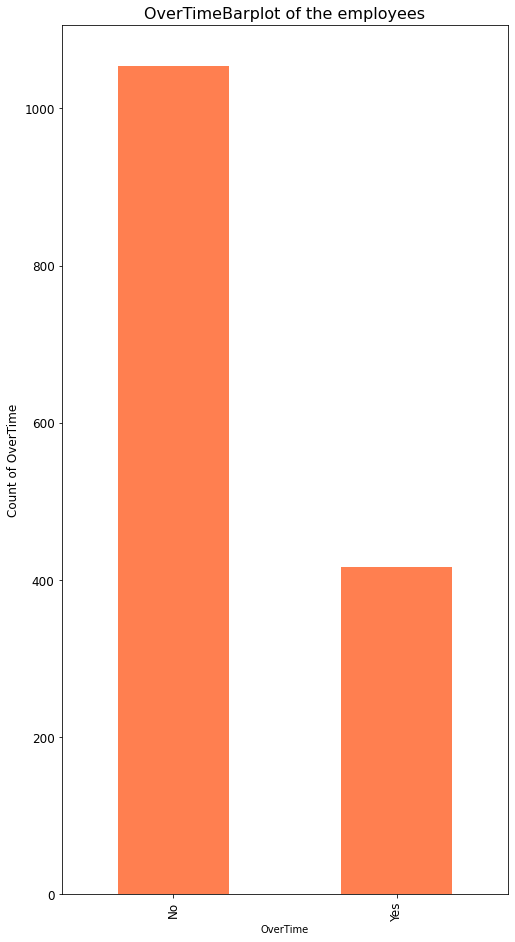

In [3]:
Graphs_v1(att)

Q2) Create a function named Graph_v2 that takes a dataset as input and exports bar plots for all the
categorical columns of the data and for the numeric columns it checks if the if the variable is discrete
(or contains a lesser number of unique values) or continuous and plot the graph accordingly. For
discrete numeric variables, it plots bar plot and for continuous it plots histogram &amp; boxplot.

In [4]:
def Graphs_v2(att):
    num1=list(att.select_dtypes(include=[np.number])) #Getting numerical columns from the dataset 
    cat1=list(att.select_dtypes(exclude=[np.number])) #Getting categorical columns from the dataset 
    
    threshold = 5  #Setting a minimum threshold for unique values
    for i in num1:
        unique_val = att[i].nunique()   #Checking for count of unique values in the columns
        if unique_val<=threshold: 
            cat1.append(i)    #appending the discrete features to categorical list
        
    num1 = list(filter(lambda i: i not in cat1, num1))   #Getting the numerical and continuous columns
        
    for feature in num1:
        
        #Creating Histograms for numerical and continuous columns
        att.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency of employee",fontsize=12) #Title of y-axis
        plt.title(feature +" Histogram",fontsize=16)  #Title of histogram
        plt.savefig(feature+"_Histogram.png", facecolor='w') #Exporting histogram as png image
        
        
        #Creating Boxplots for numerical and continuous columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        att.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns  

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
        plt.savefig(feature+"_BoxPlot.png", facecolor='w') #Exporting boxplot as png image
   
        
    #Creating Barplots for categorical and discrete features
    for feature in cat1:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        att[feature].value_counts().plot(kind='bar', figsize=(8,16), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
        plt.title(feature+" of the employees", fontsize=16) #Title of barplot
        plt.savefig(feature+"_BarPlot.png", facecolor='w') #Exporting barplot as png image
       

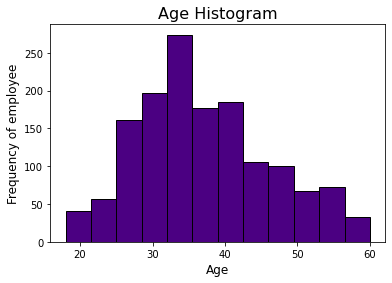

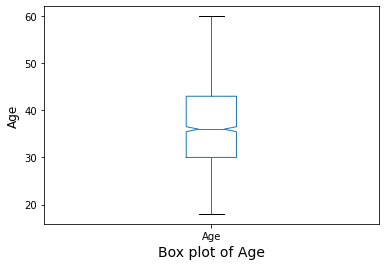

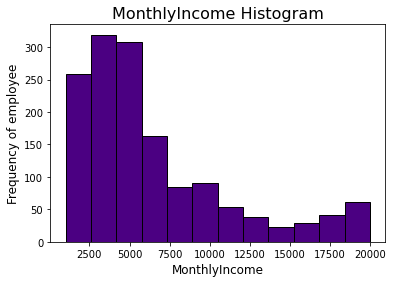

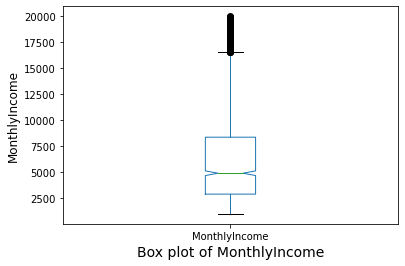

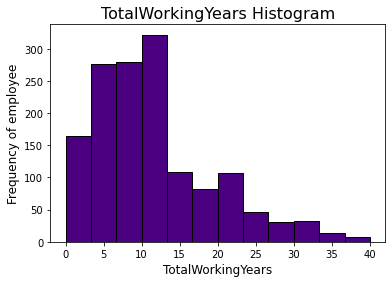

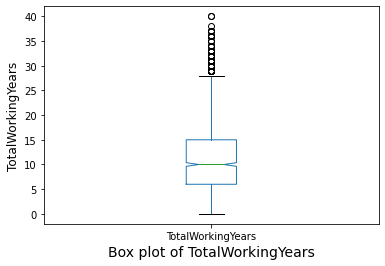

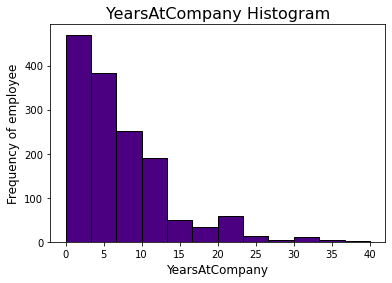

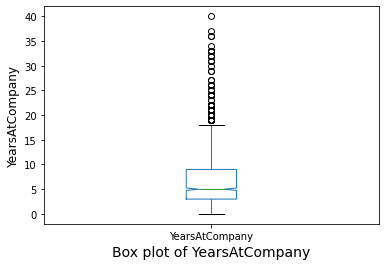

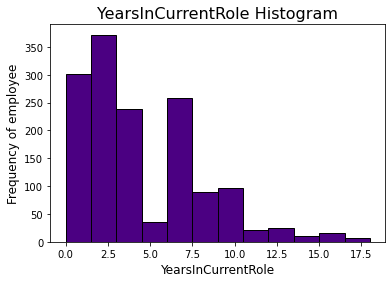

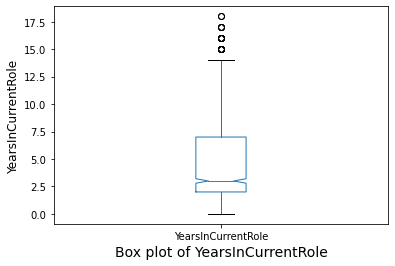

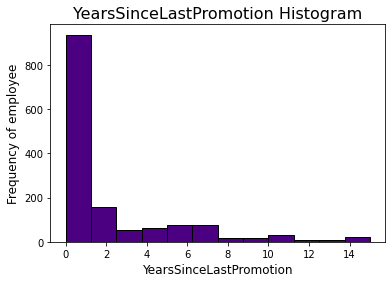

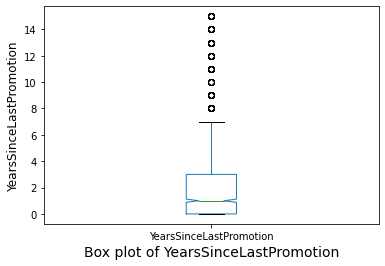

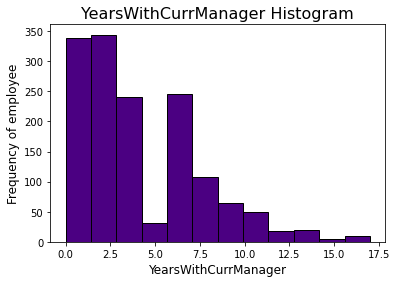

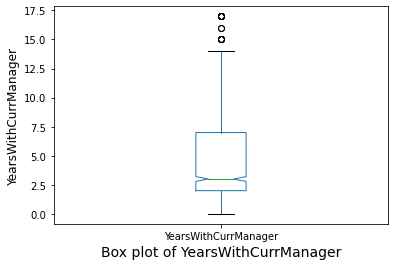

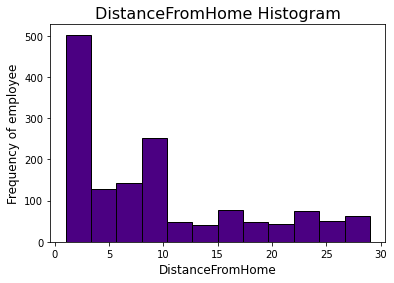

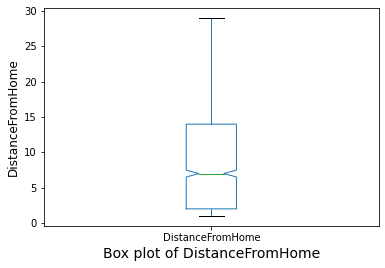

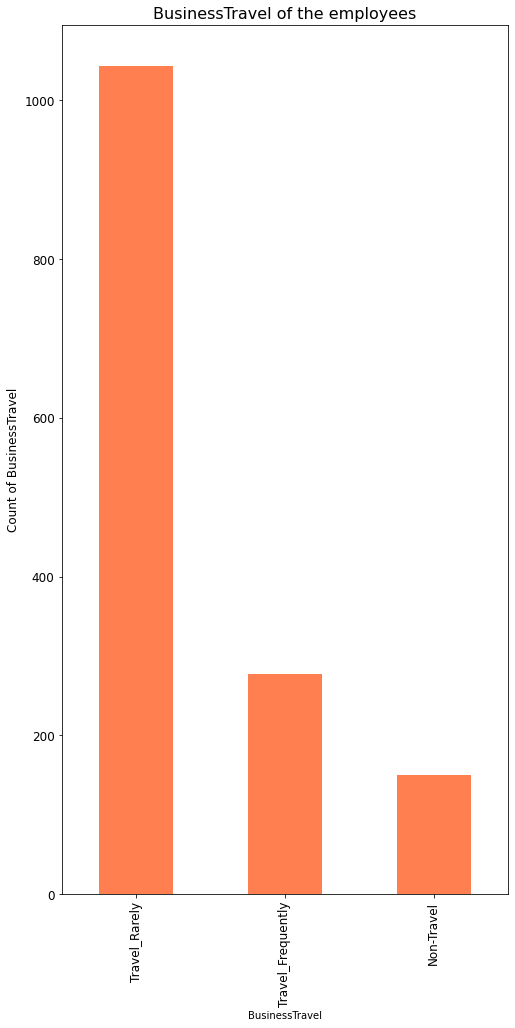

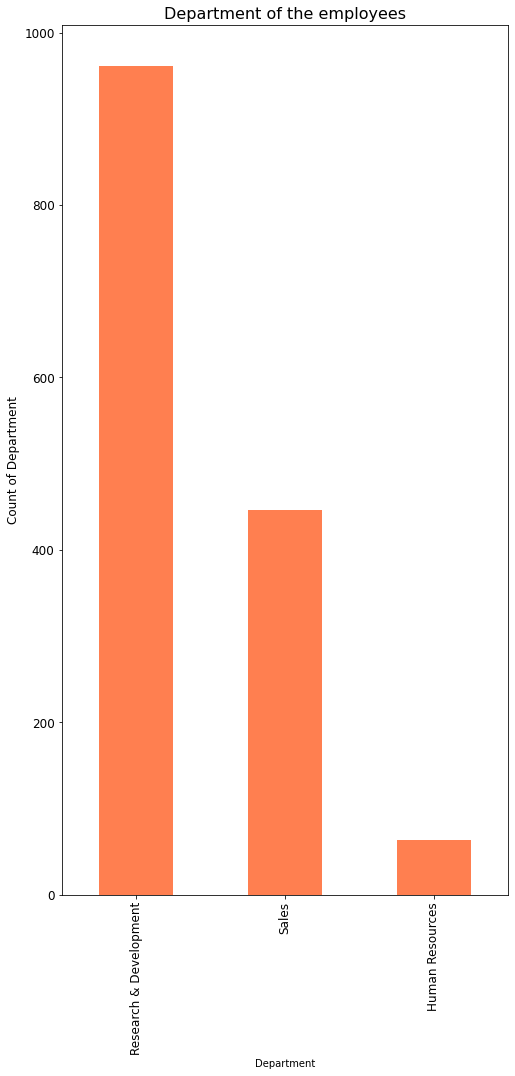

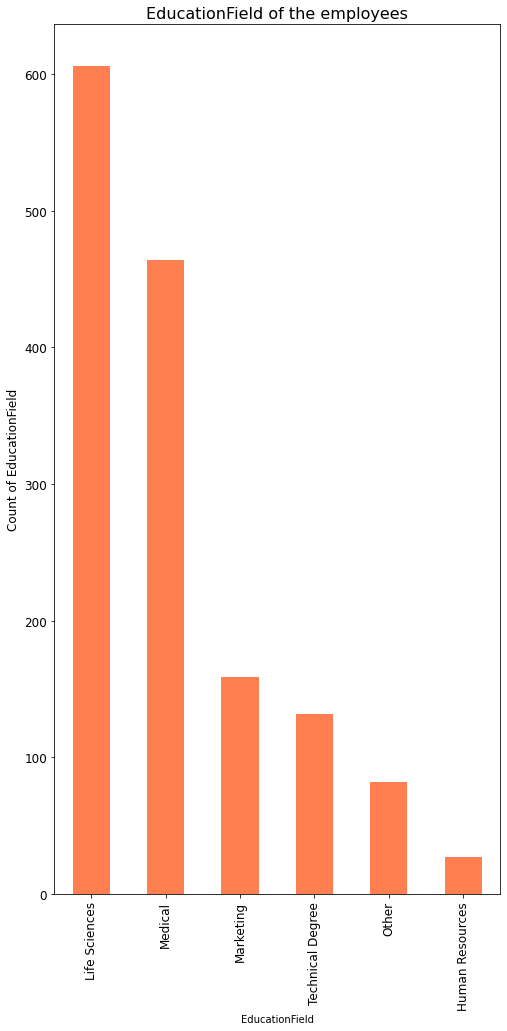

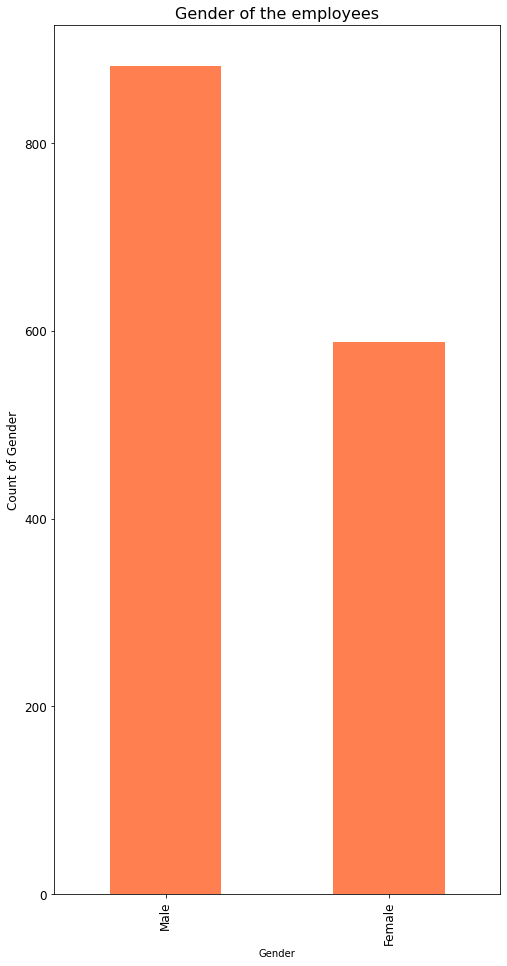

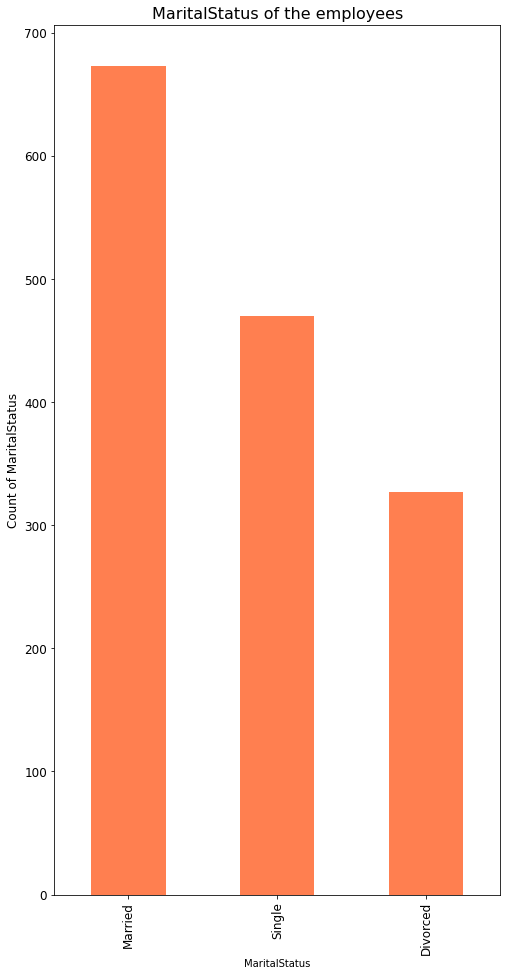

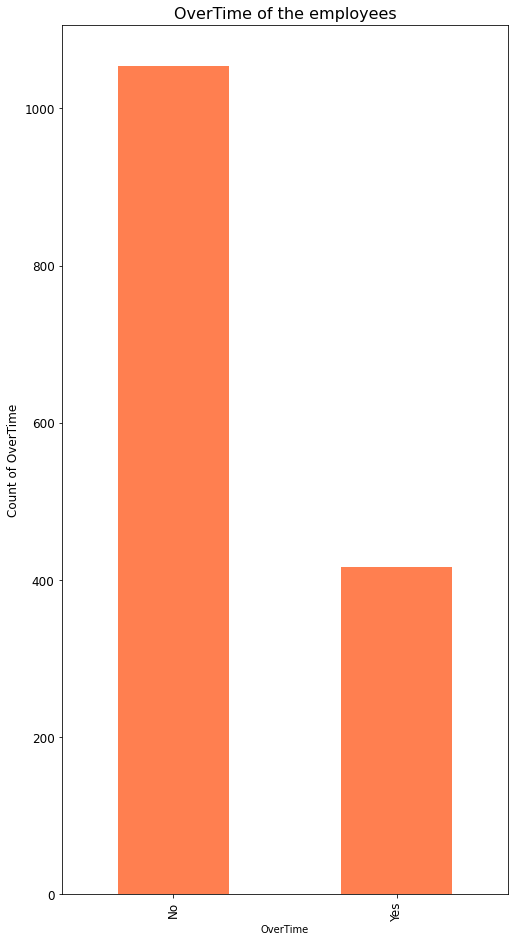

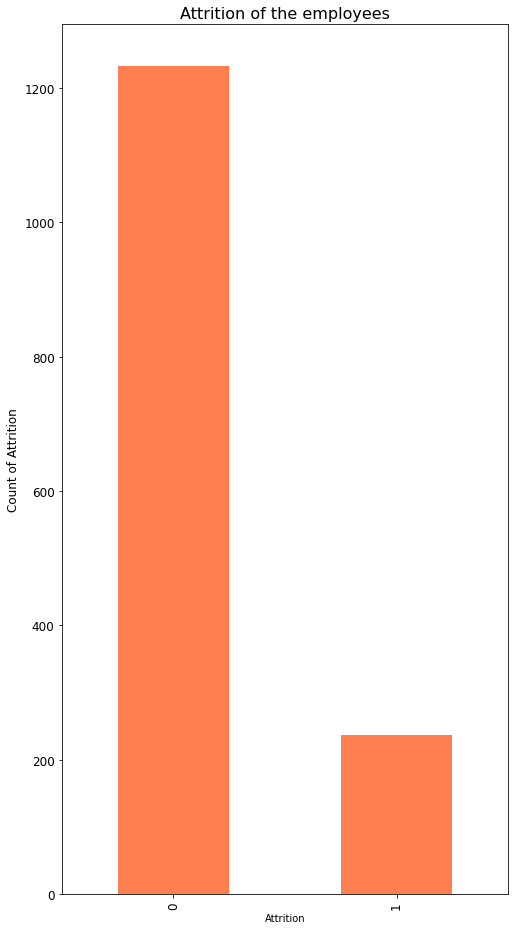

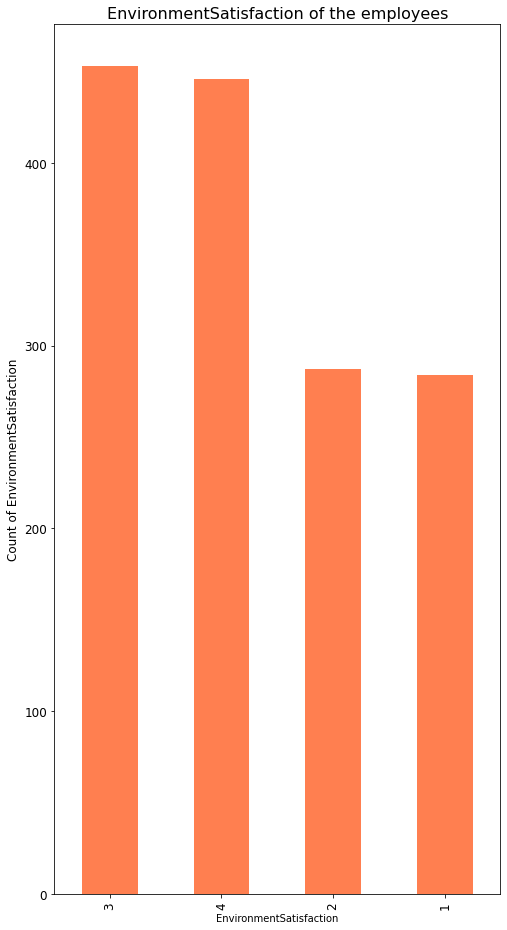

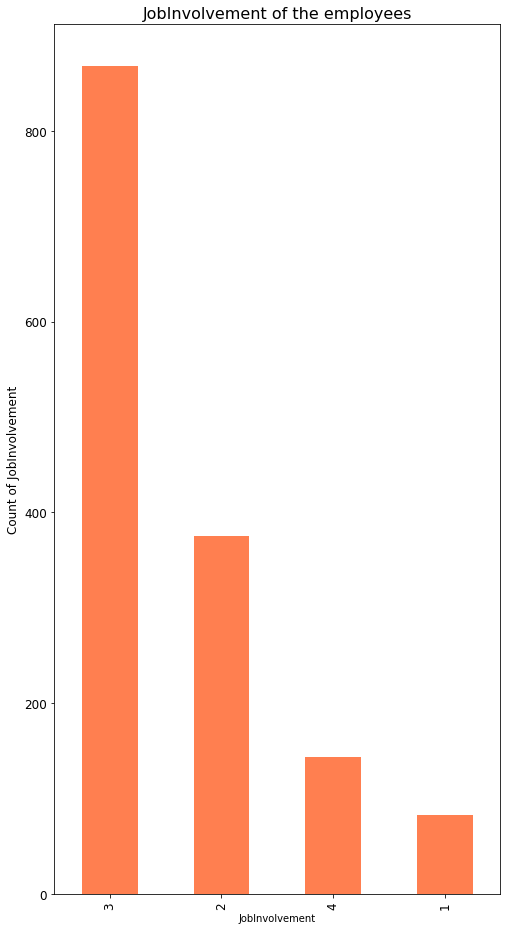

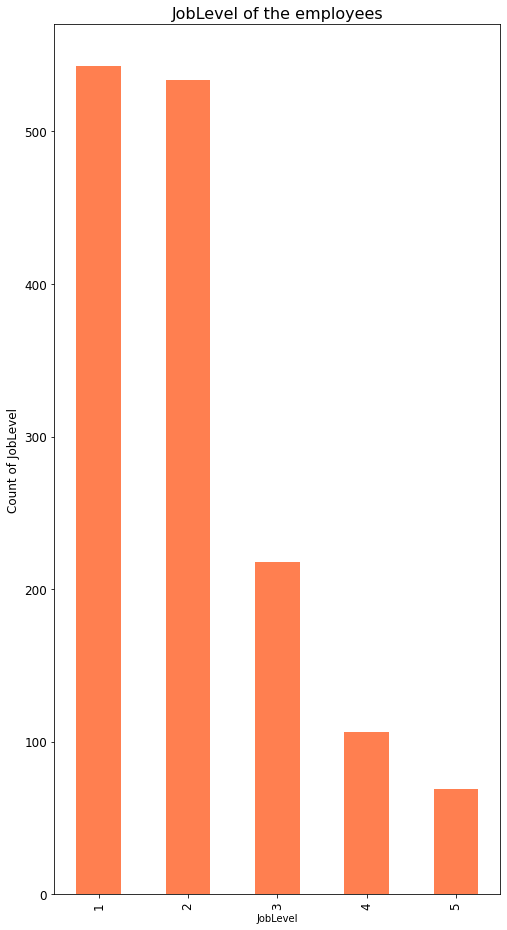

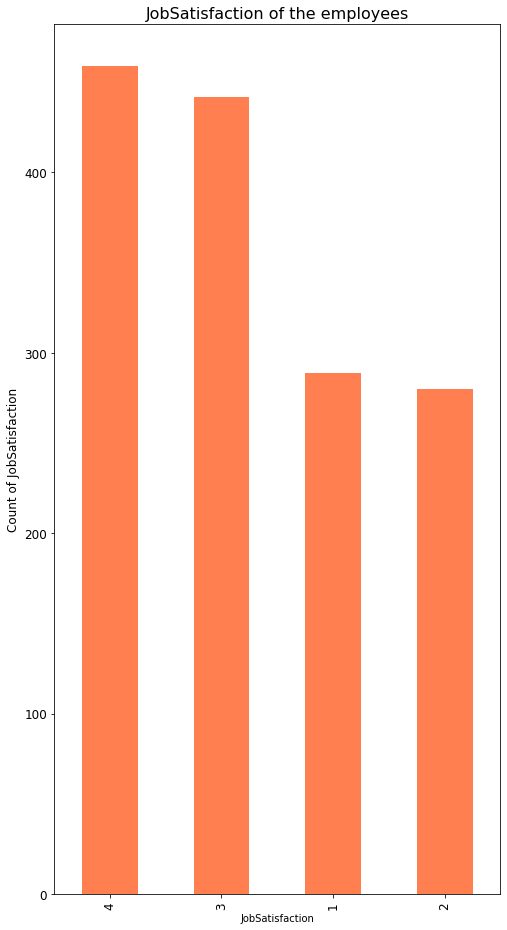

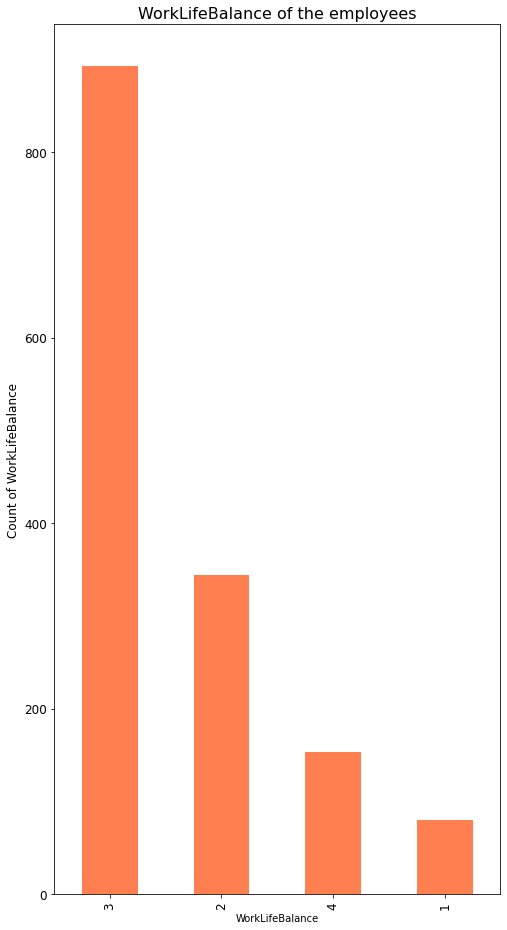

In [5]:
Graphs_v2(att)

Q3) Create a function named Graph_v3 that functions similar to Graph_v2 but takes 2 arguments – data, columns. Using the 
argument columns one can provide a list of interested columns (or column index). The graphs are plotted only of the columns 
provided. If nothing is mentioned then the graphs are plotted for all the columns.

In [4]:
def Graphs_v3(att, x= None):
    if x != None:
        selected_att = att.iloc[:,x]  #getting the selected columns
    else:
        selected_att = att.iloc[:,:] 
    
    num2=list(selected_att.select_dtypes(include=[np.number])) #Getting numerical columns from the dataset 
    cat2=list(selected_att.select_dtypes(exclude=[np.number])) #Getting categorical columns from the dataset 
    
    threshold = 5  #Setting a minimum threshold for unique values
    for i in num2:
        unique_val = selected_att[i].nunique()   #Checking for count of unique values in the columns
        if unique_val<=threshold:
            cat2.append(i)    #appending the discrete features to categorical list
        

    num2 = list(filter(lambda i: i not in cat2, num2))   #Getting the numerical and continuous columns
    
    for feature in num2:
        
        #Creating Histograms for numerical and continuous features
        att.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency of employee",fontsize=12) #Title of y-axis
        plt.title(feature+" Histogram"+feature,fontsize=16)  #Title of histogram
        plt.savefig(feature+"_Histogram.png", facecolor='w') #Exporting histogram as png image
        
        
        #Creating Boxplots for numerical and continuous features
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        att.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns 

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
        plt.savefig(feature+"_BoxPlot.png", facecolor='w') #Exporting boxplot as png image
   
        
        #Creating Barplots for categorical and discrete features
    for feature in cat2:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        att[feature].value_counts().plot(kind='bar', figsize=(8,16), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
        plt.title(feature+" of the employees", fontsize=16) #Title of barplot
        plt.savefig(feature+"_BarPlot.png", facecolor='w') #Exporting barplot as png image
       

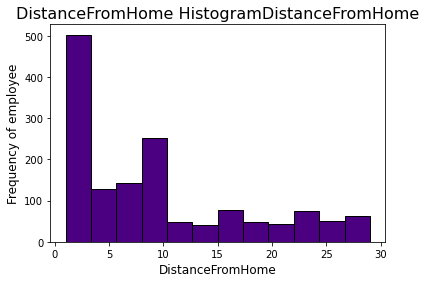

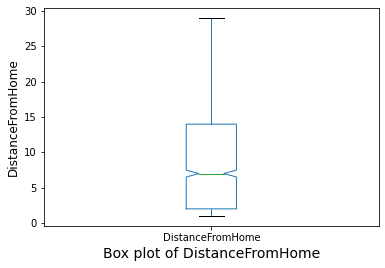

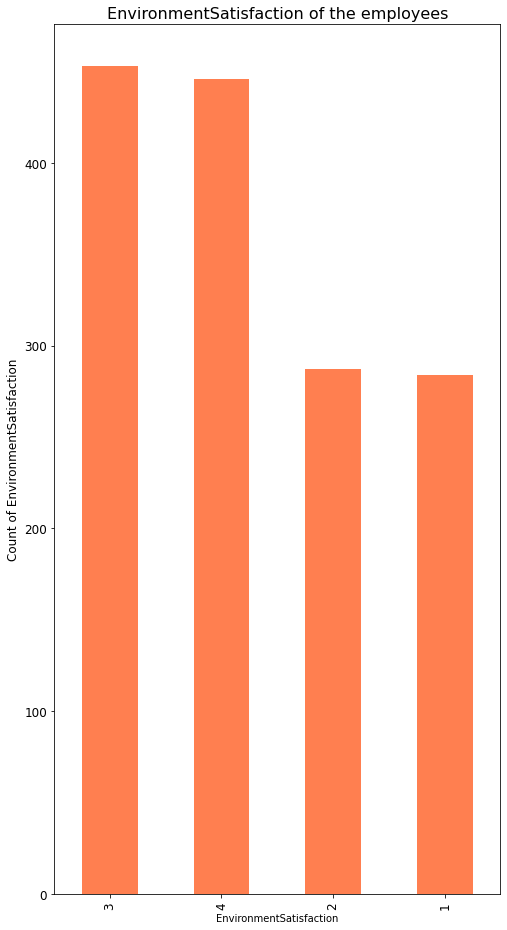

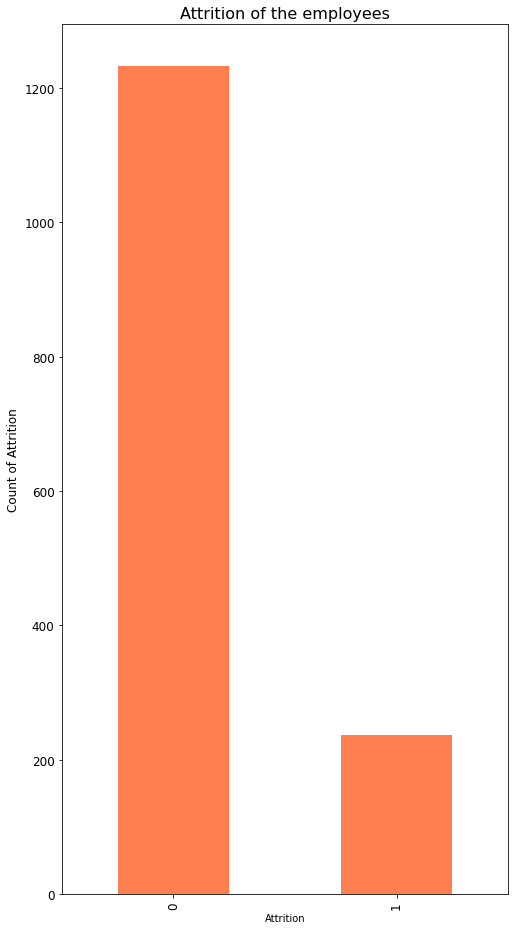

In [6]:
Graphs_v3(att, [19,5,1])

Q4)Create a function named Graph_v4 that gives the same output as Graph_v3 but takes 3 arguments – data, columns, dir. “dir” is used to specify a folder where the graphs should be exported. If kept blank then the graph gets exported in the working directory.

In [8]:
def Graphs_v4(att, x= None,dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment'):  #creating with default directory
    if x != None:
        selected_att = att.iloc[:,x]   #getting the selected columns
    else:
        selected_att = att.iloc[:,:] 
    
    num2=list(selected_att.select_dtypes(include=[np.number])) #Getting numerical columns from the dataset
    cat2=list(selected_att.select_dtypes(exclude=[np.number])) #Getting categorical columns from the dataset
    
    threshold = 5  #Setting a minimum threshold for unique values
    for i in num2:
        unique_val = selected_att[i].nunique()
        if unique_val<=threshold:
            cat2.append(i)    #appending the discrete features to categorical list
        

    num2 = list(filter(lambda i: i not in cat2, num2))   #Getting the numerical and continuous columns
        
    for feature in num2:
        
        #Creating Histograms for numerical and continuous columns
        att.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency of employee",fontsize=12) #Title of y-axis
        plt.title(feature+" Histogram",fontsize=16)  #Title of histogram
        os.chdir(dir) #Changing working directory
        plt.savefig(feature+"_Histogram.png", facecolor='w') #Exporting histogram as png image
        
        
        #Creating Boxplots for numerical and continuous columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        att.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns 

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
        os.chdir(dir) #Changing working directory
        plt.savefig(feature+"_BoxPlot.png", facecolor='w') #Exporting boxplot as png image
   
        
        #Creating Barplots for categorical and discrete columns
    for feature in cat2:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        att[feature].value_counts().plot(kind='bar', figsize=(8,16), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
        plt.title(feature+" of the employees", fontsize=16) #Title of barplot
        os.chdir(dir) #Changing working directory
        plt.savefig(feature+"_BarPlot.png", facecolor='w') #Exporting barplot as png image
       
    

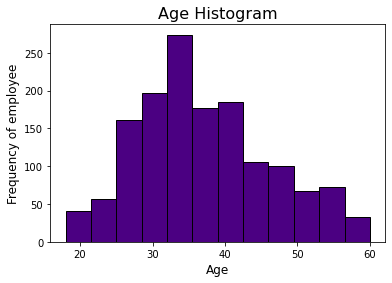

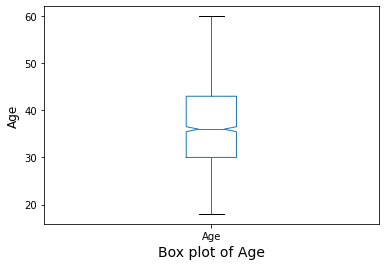

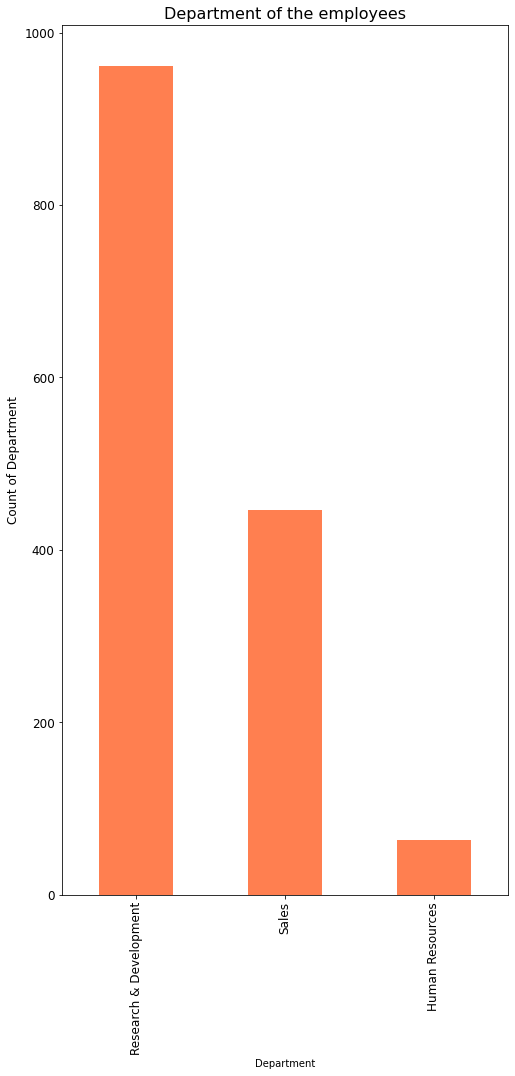

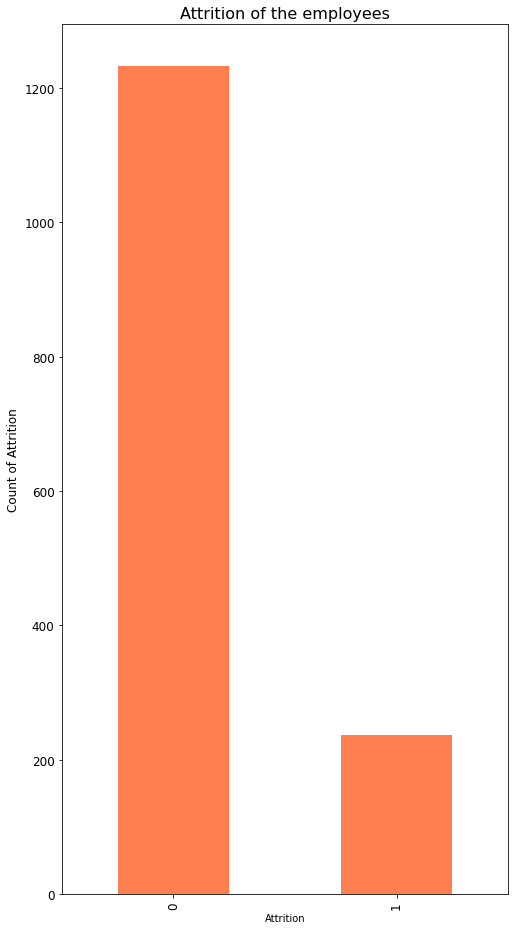

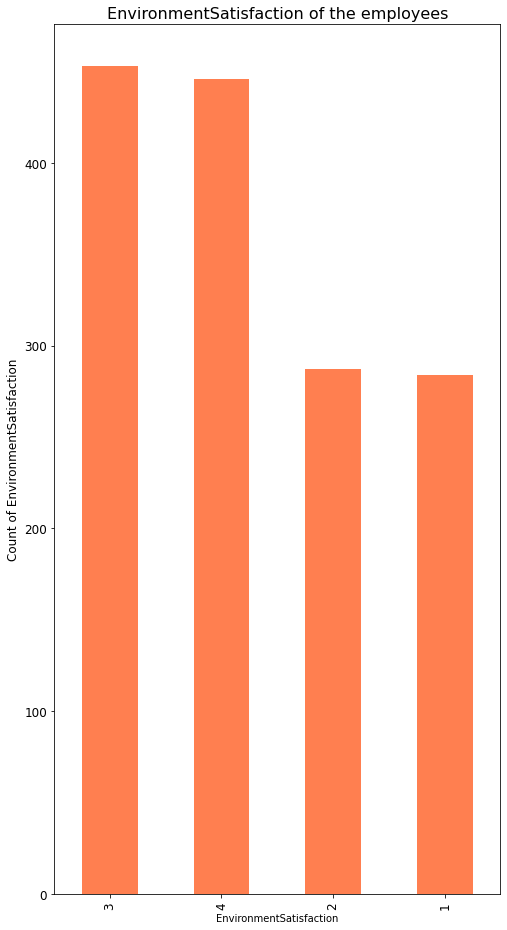

In [19]:
Graphs_v4(att, [3,1,0,5],dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment\NewQ4')

Q5) Ojective and Purpose : To create a Correlation Matrix of any numeric attributes that are entered by the user, into a particular directory. 

Often, the correlation matrix is a very important factor to understand the similarity between attributes. Here, the function Graphs_v5 takes in any variables from the user and exports the correlation heatmap to the user specified directory.

In [15]:
def corr(num2,dir):
    data_x=att[num2]   #selecting the columns for correlation matrix
    plt.figure(figsize = (14,14))
    sns.heatmap(data_x.corr(), annot = True, fmt = '.0%')  #generating heatmap
    os.chdir(dir) #Changing working directory
    plt.savefig("Heatmap.png", facecolor='w')    #Exporting heatmap as png image

In [16]:
def Graphs_v5(att, x= None, dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment'): #creating with default directory
    if x != None:
        selected_att = att.iloc[:,x]   #getting selected columns
    else:
        selected_att = att.iloc[:,:] 
    
    num2=list(selected_att.select_dtypes(include=[np.number])) #Getting numerical columns from the dataset
    cat2=list(selected_att.select_dtypes(exclude=[np.number])) #Getting categorical columns from the dataset
    
    threshold = 5  #Setting a minimum threshold for unique values
    for i in num2:
        unique_val = selected_att[i].nunique()   #Checking for count of unique values in the columns
        if unique_val<=threshold:
            cat2.append(i)    #appending the discrete features to categorical list
        

    num2 = list(filter(lambda i: i not in cat2, num2))   #Getting the numerical and continuous features
    corr(num2,dir)    #calling correlation matrix function 

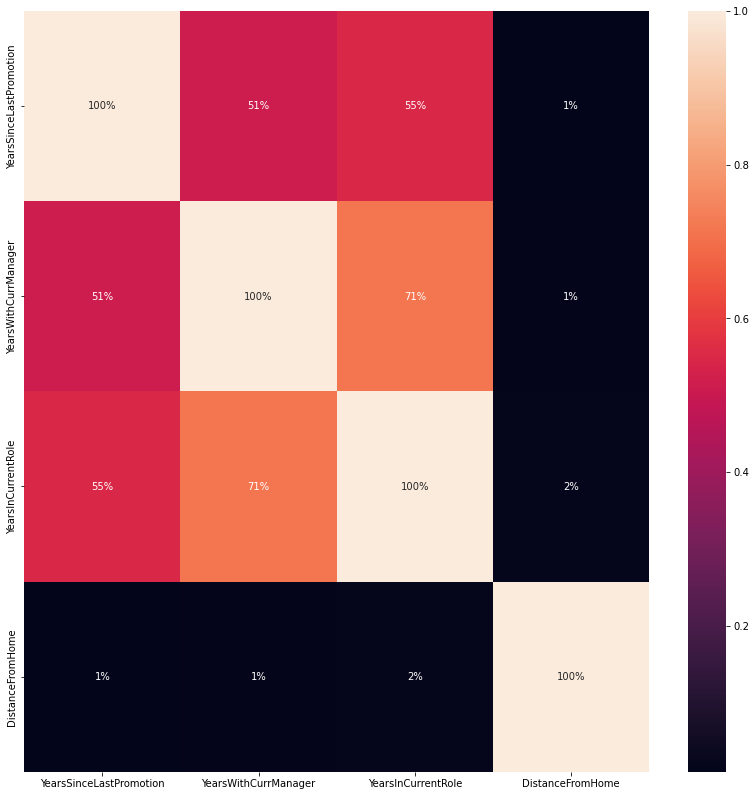

In [19]:
Graphs_v5(att,[17,18,16,19],dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment\NewQ4')

Q6) Objective and Purpose : 
The bivariant analysis of a dataset would be replete with conditional probability table and other graphs. The function Graphs_v6 takes any two variables for a bivariant analysis (feature, target) from the user. It exports Conditional probability with stacked barplot and boxplot for numerical continuous features to user specified directory. Similarly, it exports Conditional probability table with stacked barplot for discrete and categorical features to user specified directory

In [3]:
def Graphs_v6(att, x= None, dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment'):  #creating with default directory
    if x != None:
        selected_att = att.iloc[:,x]   #getting selected columns
    else:
        selected_att = att.iloc[:,:] 

    num2=list(selected_att.select_dtypes(include=[np.number])) #Getting numerical columns from the dataset
    cat2=list(selected_att.select_dtypes(exclude=[np.number])) #Getting categorical columns from the dataset
    
    threshold = 5  #Setting a minimum threshold for unique values
    for i in num2:
        unique_val = selected_att[i].nunique()  #Checking for count of unique values in the columns
        if unique_val<=threshold:
            cat2.append(i)    #appending the discrete features to categorical list
        

    num2 = list(filter(lambda i: i not in cat2, num2))   #Getting the numerical and continuous features
    
    #Bivariant analysis of Numerical variables
    if len(num2) !=0 :
        
        table = pd.crosstab(att[num2[0]],columns = att[cat2[0]])  #creating conditional probability table
        rowtotal=table.sum(axis=1)
        print("The conditional probability analysis of the two variables: \n",table.div(rowtotal,axis=0)*100)

        plt.subplots (figsize=(15,4))
        sns.countplot (x=num2[0],  hue=cat2[0], data= att, palette = 'colorblind')
        os.chdir(dir) #Changing working directory
        plt.savefig(" Stacked Bar.png", facecolor='w') #Exporting Stacked Bar Chart as png image

        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis      
        sns.boxplot(x=cat2[0], y=num2[0],  data=att,palette = "autumn_r")
        plt.gcf().set_size_inches(5, 5)
        os.chdir(dir) #Changing working directory
        plt.savefig(" Boxplot.png", facecolor='w') #Exporting boxplot as png image

    
    #Bivariant analysis of Categorical variables
    else:
        table = pd.crosstab(att[cat2[0]],columns = att[cat2[1]])  #creating conditional probability table
        rowtotal=table.sum(axis=1)
        print("The conditional probability analysis of the two variables: \n",table.div(rowtotal,axis=0)*100)
        
        plt.subplots (figsize=(15,4))
        sns.countplot (x=cat2[0],  hue=cat2[1], data= att, palette = 'colorblind')
        os.chdir(dir) #Changing working directory
        plt.savefig(" Stacked Bar.png", facecolor='w') #Exporting Stacked Bar Chart as png image

The conditional probability analysis of the two variables: 
 Attrition                         0          1
YearsSinceLastPromotion                       
0                         81.067126  18.932874
1                         86.274510  13.725490
2                         83.018868  16.981132
3                         82.692308  17.307692
4                         91.803279   8.196721
5                         95.555556   4.444444
6                         81.250000  18.750000
7                         78.947368  21.052632
8                        100.000000   0.000000
9                         76.470588  23.529412
10                        83.333333  16.666667
11                        91.666667   8.333333
12                       100.000000   0.000000
13                        80.000000  20.000000
14                        88.888889  11.111111
15                        76.923077  23.076923


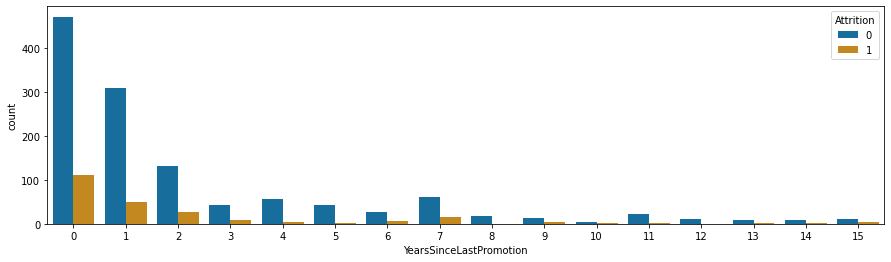

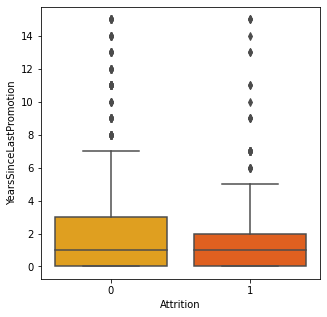

In [20]:
Graphs_v6(att, [17,1],dir=r'C:\Users\ssupa\Desktop\Python Projects\IML\Assignment\Python Assignment\NewQ4')  